# Advanced Topics for Lecture 8

## Code for Creating Data Visuals in the Lecture Notes

The code for creating the data visuals in the lecture notes are presented below.

### Question 1

#### Data preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gdp = pd.read_csv('gdp.csv')
gdp_new = gdp.set_index('Country Code')
asean_countries = ['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 
                   'MMR', 'PHL', 'SGP', 'THA', 'VNM']
asean_gdp = gdp_new.loc[asean_countries, '1999':'2020']
asean_gdp

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,,,,,,,,,,,,
BRN,4.600000e+09,6.001153e+09,5.601091e+09,5.843329e+09,6.557333e+09,7.872333e+09,9.531403e+09,1.147070e+10,1.224769e+10,1.439310e+10,...,1.852532e+10,1.904794e+10,1.809383e+10,1.709834e+10,1.293039e+10,1.140085e+10,1.212810e+10,1.356735e+10,1.346942e+10,1.200583e+10
KHM,3.517242e+09,3.654032e+09,3.984001e+09,4.284028e+09,4.658247e+09,5.337833e+09,6.293046e+09,7.274596e+09,8.639236e+09,1.035191e+10,...,1.282954e+10,1.405444e+10,1.522799e+10,1.670261e+10,1.804995e+10,2.001675e+10,2.217720e+10,2.457175e+10,2.708939e+10,2.587280e+10
IDN,1.400014e+11,1.650210e+11,1.604469e+11,1.956606e+11,2.347725e+11,2.568369e+11,2.858686e+11,3.645705e+11,4.322167e+11,5.102286e+11,...,8.929691e+11,9.178699e+11,9.125241e+11,8.908148e+11,8.608542e+11,9.318774e+11,1.015619e+12,1.042272e+12,1.119100e+12,1.058689e+12
LAO,1.454431e+09,1.731198e+09,1.768619e+09,1.758177e+09,2.023324e+09,2.366398e+09,2.735559e+09,3.455031e+09,4.223152e+09,5.446434e+09,...,8.750107e+09,1.019285e+10,1.198325e+10,1.327925e+10,1.442638e+10,1.591250e+10,1.707116e+10,1.814165e+10,1.874056e+10,1.898180e+10
MYS,7.914842e+10,9.378974e+10,9.278395e+10,1.008455e+11,1.102024e+11,1.247495e+11,1.435341e+11,1.626912e+11,1.935478e+11,2.308139e+11,...,2.979520e+11,3.144431e+11,3.232772e+11,3.380620e+11,3.013548e+11,3.012554e+11,3.191121e+11,3.587915e+11,3.652764e+11,3.370060e+11
MMR,5.643819e+09,6.849322e+09,6.220271e+09,6.110633e+09,7.754647e+09,9.390855e+09,1.058843e+10,1.186302e+10,1.559118e+10,2.301302e+10,...,5.411860e+10,5.831868e+10,6.057226e+10,6.326489e+10,6.304531e+10,6.029174e+10,6.144939e+10,6.714473e+10,6.869776e+10,7.893026e+10
PHL,8.564013e+10,8.366969e+10,7.892123e+10,8.430729e+10,8.703915e+10,9.500203e+10,1.074200e+11,1.276529e+11,1.559804e+11,1.816246e+11,...,2.342169e+11,2.619205e+11,2.839027e+11,2.974832e+11,3.064461e+11,3.186268e+11,3.284809e+11,3.468421e+11,3.768233e+11,3.617511e+11
SGP,8.628466e+10,9.607448e+10,8.979494e+10,9.253775e+10,9.764545e+10,1.150355e+11,1.278076e+11,1.486304e+11,1.809419e+11,1.936120e+11,...,2.793512e+11,2.950872e+11,3.075764e+11,3.148512e+11,3.080041e+11,3.188324e+11,3.431934e+11,3.769981e+11,3.754727e+11,3.452959e+11
THA,1.266691e+11,1.263922e+11,1.202965e+11,1.343009e+11,1.522807e+11,1.728957e+11,1.893185e+11,2.217582e+11,2.629425e+11,2.913830e+11,...,3.708191e+11,3.975582e+11,4.203332e+11,4.073395e+11,4.012964e+11,4.133662e+11,4.563570e+11,5.067546e+11,5.440811e+11,4.996818e+11


#### Spaghetti graph

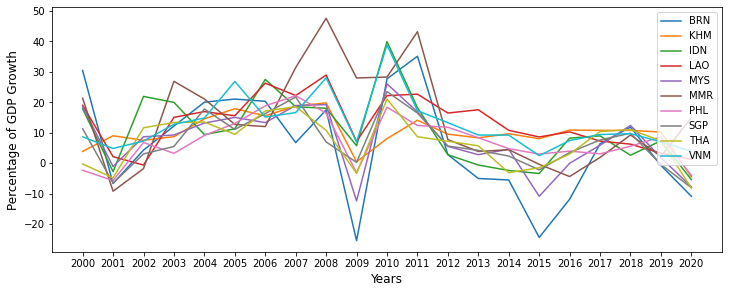

In [2]:
plt.figure(figsize=(12, 4.5))
for country in asean_gdp.index:
    growth = asean_gdp.loc[country].pct_change().dropna() * 100
    plt.plot(growth.index, growth, label=country)

plt.legend(loc='upper right')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Percentage of GDP Growth', fontsize=12)
plt.show()

#### Function for the graph highlighting one country

In [3]:
def highlight_one(data, highlight):
    
    plt.figure(figsize=(12, 4.5))
    countries = data.index
    for country in countries:
        growth = data.loc[country].pct_change().dropna() * 100
        if country == highlight:
            plt.plot(growth.index, growth, 
                     marker='o', markerfacecolor='w', color='b', linewidth=2.5)
            text_y = growth[-1]
        else:
            plt.plot(growth.index, growth, 
                     color='k', linewidth=0.8, alpha=0.4)
    
    plt.text(len(growth) - 0.7, text_y-1.5, highlight, 
             color='b', fontsize=14, fontweight='bold')
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('Percentage of GDP Growth', fontsize=12)
    plt.xlim([-1, len(growth)+0.5])
    plt.show()

Once the function above is defined, we can use it to plot the GDP for each country.

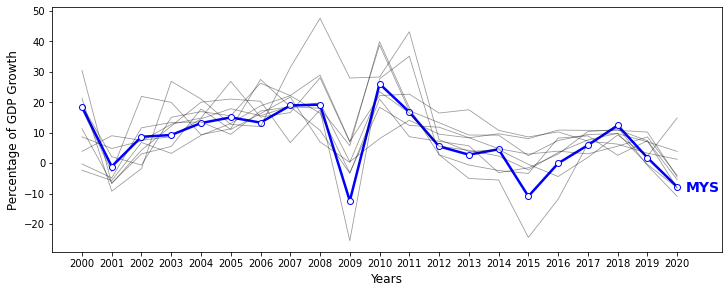

In [4]:
highlight_one(asean_gdp, highlight='MYS')

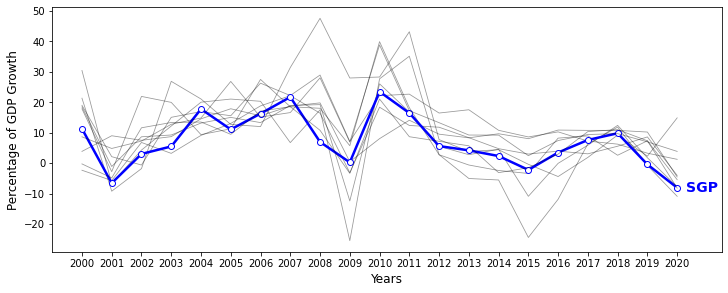

In [5]:
highlight_one(asean_gdp, highlight='SGP')

#### Function for the graph showing the range

In [6]:
def highlight_range(data, highlight):
    
    plt.figure(figsize=(12, 4.5))
    
    growths = data.pct_change(axis=1).iloc[:, 1:] * 100
    growth = growths.loc[highlight]
    text_y = growth[-1]
    
    growth_max = growths.max()
    growth_min = growths.min()
    
    plt.fill_between(growth.index, y1=growth_min, y2=growth_max, color='k', alpha=0.1)
    plt.plot(growth.index, growth, 
             marker='o', markerfacecolor='w', color='b', linewidth=2.5)
    plt.text(len(growth) - 0.7, text_y-1.5, highlight, 
             color='b', fontsize=14, fontweight='bold')
    plt.xlabel('Years', fontsize=12)
    plt.ylabel('Percentage of GDP Growth', fontsize=12)
    plt.xlim([-1, len(growth)+0.5])
    plt.show()

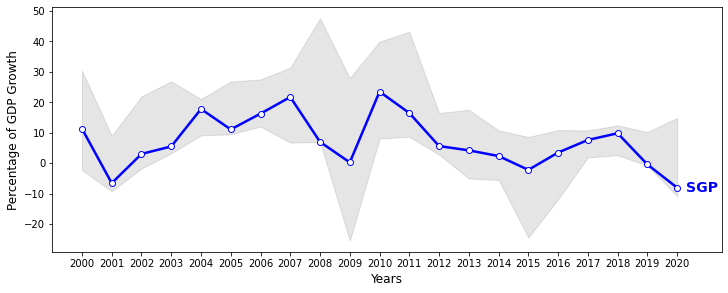

In [7]:
highlight_range(asean_gdp, highlight='SGP')

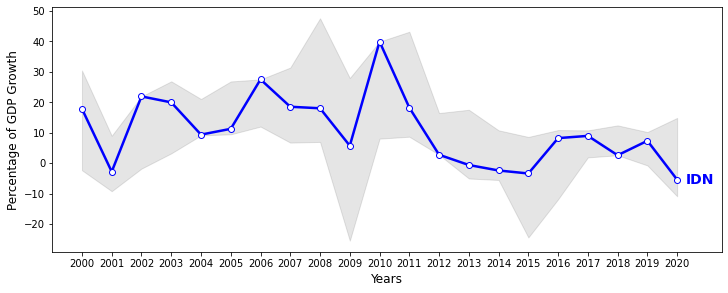

In [8]:
highlight_range(asean_gdp, highlight='IDN')

### Question 2

#### Vertical bars

In [9]:
gdp_sorted = asean_gdp['2019'].sort_values(ascending=False)
gdp_sorted

Country Code
IDN    1.119100e+12
THA    5.440811e+11
PHL    3.768233e+11
SGP    3.754727e+11
MYS    3.652764e+11
VNM    3.303913e+11
MMR    6.869776e+10
KHM    2.708939e+10
LAO    1.874056e+10
BRN    1.346942e+10
Name: 2019, dtype: float64

Text(0, 0.5, 'GDP (billion dollars)')

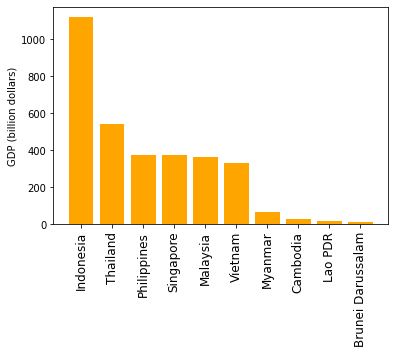

In [10]:
country_names = gdp_new.loc[gdp_sorted.index, 'Country Name']
plt.bar(country_names, gdp_sorted/1e9, 
        color='orange')
plt.xticks(rotation=90, fontsize=12)
plt.ylabel('GDP (billion dollars)')

#### Horizontal bars

In [11]:
gdp_sorted = asean_gdp['2019'].sort_values()
gdp_sorted

Country Code
BRN    1.346942e+10
LAO    1.874056e+10
KHM    2.708939e+10
MMR    6.869776e+10
VNM    3.303913e+11
MYS    3.652764e+11
SGP    3.754727e+11
PHL    3.768233e+11
THA    5.440811e+11
IDN    1.119100e+12
Name: 2019, dtype: float64

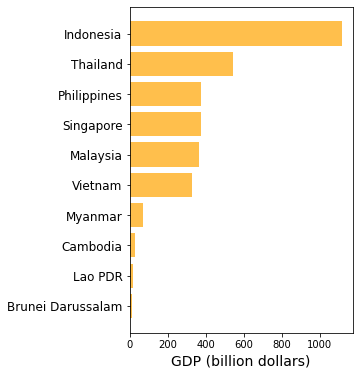

In [12]:
country_names = gdp_new.loc[gdp_sorted.index, 'Country Name']

plt.figure(figsize=(4, 6))
plt.barh(country_names, gdp_sorted/1e9, color='orange', alpha=0.7)
plt.xlabel('GDP (billion dollars)', fontsize=14)
plt.yticks(fontsize=12)
plt.show()

### Question 4

#### Read data

In [13]:
condo = pd.read_csv('condos_2018.csv')
condo

,project,street,segment,commence,sale,price,area,level
0,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,1672280.0,1281,16 to 20
1,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,1622810.0,1453,01 to 05
2,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,915680.0,667,06 to 10
3,SELETAR PARK RESIDENCE,SELETAR ROAD,OCR,2011.0,Resale,1300000.0,1442,01 to 05
4,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,1234810.0,980,06 to 10
...,...,...,...,...,...,...,...,...
314,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,668000.0,506,16 to 20
315,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,771000.0,581,11 to 15
316,SUNRISE GARDENS,SUNRISE AVENUE,OCR,1995.0,Resale,1088000.0,1464,01 to 05
317,PARC BOTANNIA,FERNVALE STREET,OCR,2016.0,New Sale,857000.0,667,06 to 10


#### Boxplot for total prices

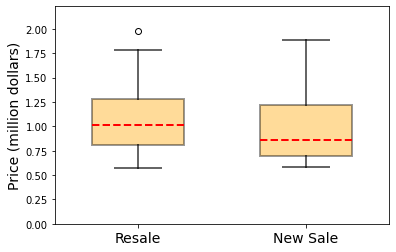

In [14]:
labels = ['Resale', 'New Sale']
prices = [condo.loc[condo['sale'] == sale, 'price']/1e6 for sale in labels]

plt.boxplot(prices, labels=labels, widths = 0.55, patch_artist = True, 
            boxprops=dict(facecolor='orange', linewidth=2, alpha=0.4),
            whiskerprops=dict(linewidth=2, alpha=0.6), 
            capprops=dict(linewidth=2, alpha=0.6),
            medianprops=dict(linewidth=2, linestyle='--', color='r'))
plt.xticks(fontsize=14)
plt.ylabel('Price (million dollars)', fontsize=14)
plt.ylim([0, 2.23])
plt.show()

#### Correlation between total prices and commencing years

In [15]:
condo.loc[:, ['commence', 'price']].corr()

,commence,price
commence,1.000000,-0.129123
price,-0.129123,1.000000


#### Boxplots for areas

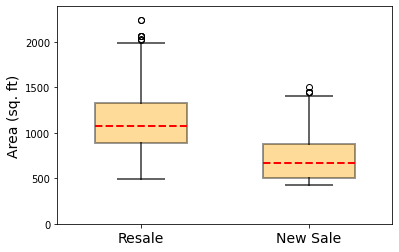

In [16]:
labels = ['Resale', 'New Sale']
areas = [condo.loc[condo['sale'] == sale, 'area'] for sale in labels]

plt.boxplot(areas, labels=labels, widths = 0.55, patch_artist = True, 
            boxprops=dict(facecolor='orange', linewidth=2, alpha=0.4),
            whiskerprops=dict(linewidth=2, alpha=0.6), 
            capprops=dict(linewidth=2, alpha=0.6),
            medianprops=dict(linewidth=2, linestyle='--', color='r'))
plt.xticks(fontsize=14)
plt.ylabel('Area (sq. ft)', fontsize=14)
plt.ylim([0, 2390])
plt.show()

#### Correlation with the confounder

In [17]:
condo.corr()

,commence,price,area
commence,1.000000,-0.129123,-0.600679
price,-0.129123,1.000000,0.829969
area,-0.600679,0.829969,1.000000


#### Boxplots for per square foot prices

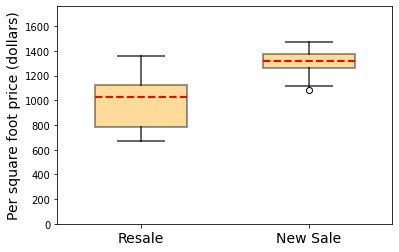

In [18]:
labels = ['Resale', 'New Sale']
psf_prices = [condo.loc[condo['sale'] == sale, 'price'] / condo.loc[condo['sale'] == sale, 'area'] 
              for sale in labels]

plt.boxplot(psf_prices, labels=labels, widths = 0.55, patch_artist = True, 
            boxprops=dict(facecolor='orange', linewidth=2, alpha=0.4),
            whiskerprops=dict(linewidth=2, alpha=0.6), 
            capprops=dict(linewidth=2, alpha=0.6),
            medianprops=dict(linewidth=2, linestyle='--', color='r'))
plt.xticks(fontsize=14)
plt.ylabel('Per square foot price (dollars)', fontsize=14)
plt.ylim([0, 1760])
plt.show()

#### Scatterplot for per square foot prices

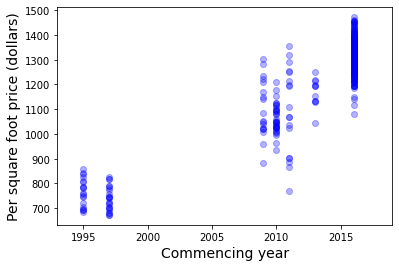

In [19]:
psf_price = condo['price'] / condo['area']

plt.scatter(condo['commence'], psf_price, 
            color='b', alpha=0.3)
plt.xlabel('Commencing year', fontsize=14)
plt.ylabel('Per square foot price (dollars)', fontsize=14)
plt.xlim([1993, 2019])
plt.show()

#### Scatterplots for area, total prices, and sale types

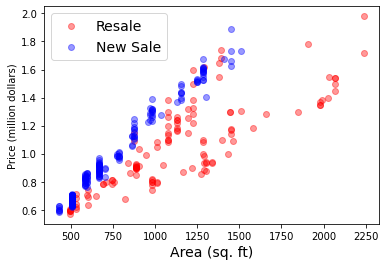

In [20]:
resale = condo.loc[condo['sale'] == 'Resale']
new = condo.loc[condo['sale'] == 'New Sale']

plt.scatter(resale['area'], resale['price']/1e6, color='r', alpha=0.4, label='Resale')
plt.scatter(new['area'], new['price']/1e6, color='b', alpha=0.4, label='New Sale')
plt.legend(fontsize=14)
plt.xlabel('Area (sq. ft)', fontsize=14)
plt.ylabel('Price (million dollars)')
plt.show()

#### Scatterplots for area, total prices, and commencing years

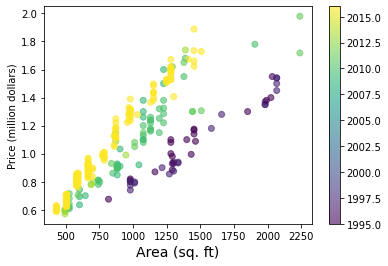

In [21]:
plt.scatter(condo['area'], condo['price']/1e6, c=condo['commence'], alpha=0.6)
plt.colorbar()
plt.xlabel('Area (sq. ft)', fontsize=14)
plt.ylabel('Price (million dollars)')
plt.show()

## Advanced Operations of Pandas

### Method `groupby()`: split, apply, and combine 

<div class="alert alert-block alert-success">
<b>Example 1:</b> The 'properties2.csv' dataset contain the prices of condos/apartments in Singapore for the past a few years. Find the average values and the sample standard deviations of property prices in the CCR, RCR, and OCR areas, respectively.
</div>
Based on what we learned in the previous lecture, these descriptive measures can be obtained by calling the methods `mean()` and `std()` after we split the overall dataset into three subsets for CCR, RCR, and OCR areas.

In [22]:
data = pd.read_csv('properties2.csv')
data

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 years,2019.0,New Sale,2567000,1496,11 to 15,Dec-21
1,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,2986000,1281,16 to 20,Dec-21
2,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1835000,700,21 to 25,Dec-21
3,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1924000,840,06 to 10,Dec-21
4,THE CREST,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 years,2012.0,Resale,1620000,883,11 to 15,Dec-21
...,...,...,...,...,...,...,...,...,...,...,...,...
104896,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,freehold,NaN,New Sale,910000,818,01 to 05,Jan-17
104897,EUPHONY GARDENS,JALAN MATA AYER,Condominium,27,OCR,99 years,1998.0,Resale,739998,1044,01 to 05,Jan-17
104898,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,875000,797,11 to 15,Jan-17
104899,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,759000,689,11 to 15,Jan-17


In [23]:
means = []
stds = []
for segment in data['segment'].unique():            # Iterate all values of segments
    subset = data.loc[data['segment'] == segment]   # Take a subset for one segment
    means.append(subset['price'].mean())            # Append the mean of the subset
    stds.append(subset['price'].std())              # Append the std of the subset

print('Average prices:      ', means)
print('Standard deviations: ', stds)

Average prices:       [1276619.2439748093, 1724618.6979773832, 3244450.583342526]
Standard deviations:  [7660807.487282858, 9024085.528027933, 14043392.743733952]


The logic of the program above can be summarized as:
1. A `for` is used to take a subset for each segment: CCR, RCR, and OCR. 
2. The average and standard deviation of each segment is calculated.
3. THe calculated results are appended to the lists `means` and `stds`.

These three steps, namely **split**, **apply**, and **combine**, can be unified into the method `groupby()` of the `pandas.DataFrame` data structure. The logic of the `groupby()` can be illustrated by the following graph.

<img src="https://jakevdp.github.io/figures/split-apply-combine.svg" width=550>

More specifically,
1. The **split** step involves breaking up and grouping a `pandas.DataFrame` object according to the values of a selected variable (or multiple variables).
2. The **apply** step involves computing some function, usually an aggregate (like `sum()` in the graph), transformation, or filtering, within the individual groups.
3. The **combine** step merges the results of these operations into a Series or data frame.

Such a logic can be used for **Example 1**, where the average values and standard deviations can be calculated by the `groupby()` method.

In [24]:
price_means = data.groupby('segment')['price'].mean()
price_means

segment
CCR    3.244451e+06
OCR    1.276619e+06
RCR    1.724619e+06
Name: price, dtype: float64

In [25]:
price_stds = data.groupby('segment')['price'].std()
price_stds

segment
CCR    1.404339e+07
OCR    7.660807e+06
RCR    9.024086e+06
Name: price, dtype: float64

The code above splits the dataset according to the values of the <code>segment</code> column, and the methods <code>mean()</code> and <code>std()</code> are applied as the aggregation calculation, then the results are combined into series. In the remaining part of this section, we will focus on the **apply** step, where different types of functions are called to perform **aggregate**, **transformation**, or **filtering** operations for each data group.

#### Aggregations via `agg()`

In **Example 1**, we have used the functions like `sum()` and `std()` to calculate an aggregated result for each group. A a more general way to apply these functions is by using the `agg()` method, where the input argument can be a function, a string of function names, or a list of such objects. 

In [26]:
funs = ['count', 'median', 'max', 'min']
price_info = data.groupby('segment')['price'].agg(funs)
price_info

,count,median,max,min
segment,,,,
CCR,18130,2111489.5,980000000,550000
OCR,49542,1128000.0,970000000,340000
RCR,37229,1408000.0,906700000,400000


The row indexes can be converted into a new column of the data frame by the `reset_index()` method. 

In [27]:
price_info.reset_index()

,segment,count,median,max,min
0,CCR,18130,2111489.5,980000000,550000
1,OCR,49542,1128000.0,970000000,340000
2,RCR,37229,1408000.0,906700000,400000


The aggregation operations can also be applied to multiple columns, such as the code below calculate some measures for columns `price` and `area`.

In [28]:
funs = ['count', 'median', 'max', 'min']
price_area_info = data.groupby('segment')[['price', 'area']].agg(funs)
price_area_info

price                                 area                     
         count     median        max     min  count  median     max  min
segment                                                                 
CCR      18130  2111489.5  980000000  550000  18130  1066.0  416750  323
OCR      49542  1128000.0  970000000  340000  49542   958.0  947081  323
RCR      37229  1408000.0  906700000  400000  37229   893.0  558565  258

Please note that in the resultant data frame, column indexes are formatted as a `MultiIndex` type object. It can be considered as all combinations of two layers of indexes.

In [29]:
price_area_info.columns

MultiIndex([('price',  'count'),
            ('price', 'median'),
            ('price',    'max'),
            ('price',    'min'),
            ( 'area',  'count'),
            ( 'area', 'median'),
            ( 'area',    'max'),
            ( 'area',    'min')],
           )

Another useful syntax of the `agg()` method is to pass a dictionary mapping column names to operations to be applied on that column. An example is given below.

In [30]:
mapping = {'price': 'mean',         # Average of the prices
           'area': ['min', 'max']}  # Min and max values of sizes
mean_median = data.groupby('segment').agg(mapping)
mean_median

price area        
                 mean  min     max
segment                           
CCR      3.244451e+06  323  416750
OCR      1.276619e+06  323  947081
RCR      1.724619e+06  258  558565

It is also possible to use a user-defined function for aggregation operation, as the following example.

In [31]:
def iqr(x):
    
    return x.quantile(0.75) - x.quantile(0.25)

price_iqr = data.groupby('segment')['price'].agg(iqr)
price_iqr

segment
CCR    1650000.0
OCR     530000.0
RCR     696000.0
Name: price, dtype: float64

In this code cell, we defined a function `iqr()` to calculate the interquartile range (IQR) for each region segment. This function can also be replaced by a small anonymous `lambda()` function, which is typically used to return the result expressed by a single-line statement. The syntax of the `lambda()` function is given below.

<img src="https://www.educative.io/api/edpresso/shot/6565495459282944/image/6707306488135680" width=600>

Following the syntax rules, the IQR values can be calculated without formally defining a function, yet the result is the same.

In [32]:
price_iqr = data.groupby('segment')['price'].agg(lambda x: 
                                                 x.quantile(0.75) - x.quantile(0.25))
price_iqr

segment
CCR    1650000.0
OCR     530000.0
RCR     696000.0
Name: price, dtype: float64

#### Transformation via `transform()`

You may notice that the aggregation operations summarize each group into one value, so the number of rows of the combined data structure is the same as the number of groups. In some cases, we may need to transform each row of the dataset into other values. Take the normalized prices of each region segment for example, it can be calculated by the following code.

In [33]:
def normalize(x):
    
    return (x - x.min()) / (x.max() - x.min())

price_norm = data.groupby('segment')['price'].transform(normalize)
price_norm

0         0.002297
1         0.002853
2         0.001583
3         0.001682
4         0.001346
            ...   
104896    0.000588
104897    0.000413
104898    0.000552
104899    0.000432
104900    0.000743
Name: price, Length: 104901, dtype: float64

Equivalently, the formal function `normalize()` can be replaced by the `lambda` version.

In [34]:
price_norm = data.groupby('segment')['price'].transform(lambda x: 
                                                        (x-x.min())/(x.max()-x.min()))
price_norm

0         0.002297
1         0.002853
2         0.001583
3         0.001682
4         0.001346
            ...   
104896    0.000588
104897    0.000413
104898    0.000552
104899    0.000432
104900    0.000743
Name: price, Length: 104901, dtype: float64

Please note that these operations transform each row of the original dataset into a new row of results, so the new data structure created by the `transform()` method always has the same number of rows as the original dataset.

#### Aggregation or transformation via `apply()`

The `apply()` method is a more general and more flexible version of the `agg()` or `transform()` methods. The shape of the returned data structure depends on whether the applied function is for aggregation or transformation. 

In [35]:
# Aggregation operation: IQR
price_iqr = data.groupby('segment')['price'].apply(lambda x: 
                                                   x.quantile(0.75) - x.quantile(0.25))
price_iqr

segment
CCR    1650000.0
OCR     530000.0
RCR     696000.0
Name: price, dtype: float64

In [36]:
# Transformation operation: normalization
price_norm = data.groupby('segment')['price'].apply(lambda x: 
                                                    (x-x.min())/(x.max()-x.min()))
price_norm

0         0.002297
1         0.002853
2         0.001583
3         0.001682
4         0.001346
            ...   
104896    0.000588
104897    0.000413
104898    0.000552
104899    0.000432
104900    0.000743
Name: price, Length: 104901, dtype: float64

#### Filtering via `filter()`

A filtering operation allows you to drop data based on the group properties. For example, we might want to keep all groups in which the mean price is lower than 1800 dollars per square feet. 

In [37]:
data['price_psf'] = data['price'] / data['area']

cheap_regions = data.groupby('segment').filter(lambda x: 
                                               x['price_psf'].mean() < 1800)
cheap_regions.reset_index(drop=True, inplace=True)
cheap_regions

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date,price_psf
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 years,2019.0,New Sale,2567000,1496,11 to 15,Dec-21,1715.909091
1,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,2986000,1281,16 to 20,Dec-21,2330.991413
2,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1835000,700,21 to 25,Dec-21,2621.428571
3,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1924000,840,06 to 10,Dec-21,2290.476190
4,THE CREST,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 years,2012.0,Resale,1620000,883,11 to 15,Dec-21,1834.654587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
86766,FLORAVILLE,CACTUS ROAD,Apartment,28,OCR,freehold,NaN,New Sale,910000,818,01 to 05,Jan-17,1112.469438
86767,EUPHONY GARDENS,JALAN MATA AYER,Condominium,27,OCR,99 years,1998.0,Resale,739998,1044,01 to 05,Jan-17,708.810345
86768,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,875000,797,11 to 15,Jan-17,1097.867001
86769,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,759000,689,11 to 15,Jan-17,1101.596517


It can be seen that the whole group of CCR condos/apartments are dropped because the average price for that region is larger than 1800 dollars per square feet. We can use the following code to verify the CCR segment is dropped. 

In [38]:
cheap_regions['segment'].value_counts()

OCR    49542
RCR    37229
Name: segment, dtype: int64

### Time series data <a id="subsection2.2"></a>

<div class="alert alert-block alert-success">
<b>Example 2:</b> Create a new dataset with all condo/apartment transactions from January 2018 to June 2018. 
</div>

In the dataset, we have a column `date` representing the dates of transactions. Values in this column are `str` type objects, so they cannot be directly used for date selections. 

In [39]:
date = data['date']
date.loc[0]

'Dec-21'

Python provides a new data type called `timestamp` for easy time and date operations. We can create a new column called `time_stamp` to store the date data. 

In [40]:
data['time_stamp'] = pd.to_datetime(data['date'], format='%b-%y')
data.head()

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date,price_psf,time_stamp
0,PARC CLEMATIS,JALAN LEMPENG,Apartment,5,OCR,99 years,2019.0,New Sale,2567000,1496,11 to 15,Dec-21,1715.909091,2021-12-01
1,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,2986000,1281,16 to 20,Dec-21,2330.991413,2021-12-01
2,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1835000,700,21 to 25,Dec-21,2621.428571,2021-12-01
3,ONE PEARL BANK,PEARL BANK,Apartment,3,RCR,99 years,2019.0,New Sale,1924000,840,06 to 10,Dec-21,2290.476190,2021-12-01
4,THE CREST,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 years,2012.0,Resale,1620000,883,11 to 15,Dec-21,1834.654587,2021-12-01


The conversion con be performed by the function `to_datetime`, where the first argument is a series of `str` type values, and the argument `format` specify how the string is interpreted as time information. You may use the website [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) to find other date or time formats. 

The new column is recognized by Python as time data, so we can use the simple logical operators to select data within the time range. 

In [41]:
time_range = pd.to_datetime(['Jan-18', 'Jul-18'], format='%b-%y')
time_range

DatetimeIndex(['2018-01-01', '2018-07-01'], dtype='datetime64[ns]', freq=None)

In [42]:
subset = data.loc[(data['time_stamp'] >= time_range[0]) &
                  (data['time_stamp'] < time_range[1])]
subset.reset_index(drop=True, inplace=True)
subset

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date,price_psf,time_stamp
0,MARGARET VILLE,MARGARET DRIVE,Apartment,3,RCR,99 years,2017.0,New Sale,874700,463,01 to 05,Jun-18,1889.200864,2018-06-01
1,MARGARET VILLE,MARGARET DRIVE,Apartment,3,RCR,99 years,2017.0,New Sale,1435200,829,01 to 05,Jun-18,1731.242461,2018-06-01
2,THE CLEMENT CANOPY,CLEMENTI AVENUE 1,Apartment,5,OCR,99 years,2016.0,New Sale,2090000,1346,26 to 30,Jun-18,1552.748886,2018-06-01
3,BIJOU,JALAN MAT JAMBOL,Apartment,5,RCR,freehold,NaN,New Sale,1082611,506,01 to 05,Jun-18,2139.547431,2018-06-01
4,TWIN VEW,WEST COAST VALE,Apartment,5,OCR,99 years,2017.0,New Sale,1236000,818,26 to 30,Jun-18,1511.002445,2018-06-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11016,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,1000000,915,11 to 15,Jan-18,1092.896175,2018-01-01
11017,THE GREENWICH,SELETAR ROAD,Condominium,28,OCR,99 years,2009.0,Resale,635000,603,01 to 05,Jan-18,1053.067993,2018-01-01
11018,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27,OCR,99 years,2014.0,New Sale,1015000,1023,06 to 10,Jan-18,992.179863,2018-01-01
11019,KANDIS RESIDENCE,KANDIS LINK,Condominium,27,OCR,99 years,2016.0,New Sale,673000,484,01 to 05,Jan-18,1390.495868,2018-01-01


In [43]:
subset['date'].unique()

array(['Jun-18', 'May-18', 'Apr-18', 'Mar-18', 'Feb-18', 'Jan-18'],
      dtype=object)

<div class="alert alert-block alert-success">
<b>Example 3:</b> Considering Singapore condos in the district 5, use data visualization to show the monthly trends of 1) the average unit prices; and 2) the number of transactions, in recent years. 
</div>
The subset of data for district 5 is obtained by the following code.

In [44]:
subset = data.loc[(data['district']==5) & (data['type'] == 'Condominium')].reset_index(drop=True)
subset.head(6)

,project,street,type,district,segment,tenure,commence,sale,price,area,level,date,price_psf,time_stamp
0,THE VISION,WEST COAST CRESCENT,Condominium,5,OCR,99 years,2008.0,Resale,1850000,1776,01 to 05,Dec-21,1041.666667,2021-12-01
1,HUNDRED TREES,WEST COAST DRIVE,Condominium,5,OCR,freehold,1928.0,Resale,2285000,1475,06 to 10,Dec-21,1549.152542,2021-12-01
2,PARC RIVIERA,WEST COAST VALE,Condominium,5,OCR,99 years,2015.0,Resale,900000,603,21 to 25,Dec-21,1492.537313,2021-12-01
3,THE PEAK@BALMEG,BALMEG HILL,Condominium,5,RCR,freehold,NaN,Resale,3900000,2508,01 to 05,Dec-21,1555.023923,2021-12-01
4,VARSITY PARK CONDOMINIUM,WEST COAST ROAD,Condominium,5,OCR,99 years,2004.0,Resale,1680000,1346,01 to 05,Dec-21,1248.142645,2021-12-01
5,PARC RIVIERA,WEST COAST VALE,Condominium,5,OCR,99 years,2015.0,Resale,905000,603,06 to 10,Dec-21,1500.829187,2021-12-01


The monthly aggregated values can be calculated by the <code>groupby()</code> method.

In [45]:
monthly = subset.groupby('date')['price_psf'].agg(['mean', 'count'])
monthly.reset_index(inplace=True)
monthly.head(10)

,date,mean,count
0,Apr-17,1163.148013,114
1,Apr-18,1151.555010,46
2,Apr-19,1198.012502,31
3,Apr-20,1109.530787,12
4,Apr-21,1284.179274,59
5,Aug-17,1180.845052,81
6,Aug-18,1244.961187,23
7,Aug-19,1255.101471,15
8,Aug-20,1170.805492,37
9,Aug-21,1298.162888,59


You may notice that these records are sorted alphabetically with respect to the strings of the `date` column. We then convert these strings into `timestamp` objects, so they can be correctly sorted according to the dates. 

In [46]:
monthly['time_stamp'] = pd.to_datetime(monthly['date'], format='%b-%y')
monthly.head(10)

,date,mean,count,time_stamp
0,Apr-17,1163.148013,114,2017-04-01
1,Apr-18,1151.555010,46,2018-04-01
2,Apr-19,1198.012502,31,2019-04-01
3,Apr-20,1109.530787,12,2020-04-01
4,Apr-21,1284.179274,59,2021-04-01
5,Aug-17,1180.845052,81,2017-08-01
6,Aug-18,1244.961187,23,2018-08-01
7,Aug-19,1255.101471,15,2019-08-01
8,Aug-20,1170.805492,37,2020-08-01
9,Aug-21,1298.162888,59,2021-08-01


In [47]:
monthly.sort_values(by='time_stamp', inplace=True)
monthly.head(10)

,date,mean,count,time_stamp
20,Jan-17,1242.345373,46,2017-01-01
15,Feb-17,1237.511947,184,2017-02-01
35,Mar-17,1219.544425,160,2017-03-01
0,Apr-17,1163.148013,114,2017-04-01
40,May-17,1191.400835,132,2017-05-01
30,Jun-17,1163.759609,116,2017-06-01
25,Jul-17,1181.282315,107,2017-07-01
5,Aug-17,1180.845052,81,2017-08-01
55,Sep-17,1189.783109,70,2017-09-01
50,Oct-17,1213.376923,68,2017-10-01


Now we have collected all data we need, the monthly average unit prices and the transaction counts can be visualized as follows.

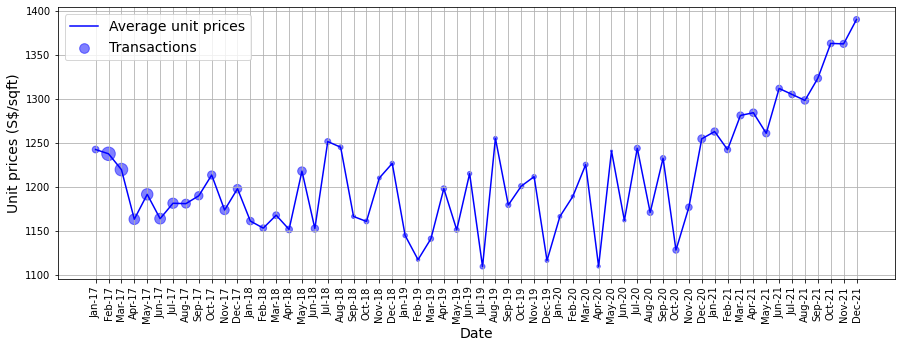

In [48]:
plt.figure(figsize=(15, 5))                          # Resize the figure
plt.plot(monthly['date'], monthly['mean'], 
         c='b', label='Average unit prices')
plt.scatter(monthly['date'], monthly['mean'], 
            s=monthly['count'], 
            c='b', alpha=0.5, label='Transactions')

plt.legend(fontsize=14)
plt.xticks(rotation=90)                             # Rotate x ticks
plt.xlabel('Date', fontsize=14)                     # X label and change the font size
plt.ylabel('Unit prices (S$/sqft)', fontsize=14)    # Y label and change the font size
plt.grid()
plt.show()